Librerias

In [52]:
import pandas as pd
import numpy as np
import csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

Cargar archivos al notebook

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/My Drive/Colab Notebooks/db'
!ls

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/db
DataAcomodacion.csv  LR_ML.xlsx		      titanic.csv
insults.csv	     Mall_Customers.csv       train_data.txt
insurance.csv	     Meteorite_Landings.csv   train_d.csv
london_merged.csv    taxes-1603948064996.csv  users-1603948482035.csv




---






In [3]:
acomodacion = pd.read_csv('DataAcomodacion.csv', encoding='latin') # the encoding 'latin' is used as alias from 'ISO-8859-1', so we can read the csv without problems
acomodacion

,id,duracion_estadia,genero,edad,niños,codigo_destino,tipo_acomodacion
0,1013321,2,F,38.0,0.0,US,NaN
1,1009487,6,M,37.0,0.0,ES,NaN
2,1002727,1,M,37.0,1.0,ES,NaN
3,1001135,5,F,50.0,0.0,UK,NaN
4,1000796,4,F,42.0,1.0,AR,NaN
...,...,...,...,...,...,...,...
4224,1007287,3,M,NaN,0.0,ES,NaN
4225,1009717,4,F,35.0,NaN,NL,NaN
4226,1012540,7,F,NaN,1.0,PE,NaN
4227,1000617,4,M,48.0,0.0,UK,NaN


In [4]:
acomodacion.dtypes

id                    int64
duracion_estadia      int64
genero               object
edad                float64
niños               float64
codigo_destino       object
tipo_acomodacion    float64
dtype: object

In [5]:
genero = {'M': 0, 'F': 1}
acomodacion.genero = [genero[item] for item in acomodacion.genero]

In [6]:
dest = {np.nan: 0, 'AR': 1, 'COL': 2, 'ES': 3, 'IT': 4, 'NL': 5, 'PE': 6, 'UK': 7, 'US': 8}
acomodacion.codigo_destino = [dest[item] for item in acomodacion.codigo_destino]

In [7]:
with open('train_data.txt', 'r') as in_file:
    stripped = (line.strip() for line in in_file)
    lines = (line.split(",") for line in stripped if line)
    with open('train_d.csv', 'w') as out_file:
        writer = csv.writer(out_file)
        writer.writerow(('c'))
        writer.writerows(lines)

In [8]:
train_data = pd.read_csv('train_d.csv')
train_data = train_data['c'].str.replace(r'\[REG\]', '')
train_data.head(8)

0     "Registro 1"
1          1010286
2                7
3                F
4               40
5                0
6              COL
7           AirBnB
Name: c, dtype: object

In [9]:
train = pd.DataFrame(train_data.values.reshape((-1,8)))
train.columns=['registro','id','duracion_estadia','genero',	'edad','niños','codigo_destino','tipo_acomodacion']
train.drop(columns='registro', inplace=True)
genero = {' M': 0, ' F': 1}
train.genero = [genero[item] for item in train.genero]
acomo = {' AirBnB': 0, ' Hotel': 1}
train.tipo_acomodacion = [acomo[item] for item in train.tipo_acomodacion]
train.head()

,id,duracion_estadia,genero,edad,niños,codigo_destino,tipo_acomodacion
0,1010286,7,1,40,0,COL,0
1,1000152,5,0,<NA>,0,<NA>,0
2,1009019,4,1,39,1,ES,1
3,1007840,5,1,45,0,NL,1
4,1006939,5,0,45,1,UK,1


In [10]:
train.groupby(['codigo_destino']).sum()

,genero,tipo_acomodacion
codigo_destino,,
<NA>,523,564
AR,548,655
COL,573,620
ES,542,586
IT,565,644
NL,524,611
PE,574,608
UK,548,641
US,584,663


In [11]:
dest = {' <NA>': 0, ' AR': 1, ' COL': 2, ' ES': 3, ' IT': 4, ' NL': 5, ' PE': 6, ' UK': 7, ' US': 8}
train.codigo_destino = [dest[item] for item in train.codigo_destino]

In [12]:
train

,id,duracion_estadia,genero,edad,niños,codigo_destino,tipo_acomodacion
0,1010286,7,1,40,0,2,0
1,1000152,5,0,<NA>,0,0,0
2,1009019,4,1,39,1,3,1
3,1007840,5,1,45,0,5,1
4,1006939,5,0,45,1,7,1
...,...,...,...,...,...,...,...
9863,1002141,2,1,42,0,3,0
9864,1009145,6,0,43,1,6,0
9865,1008594,4,0,39,0,4,1
9866,1007938,3,0,37,1,4,1


In [13]:
train.dtypes

id                  object
duracion_estadia    object
genero               int64
edad                object
niños               object
codigo_destino       int64
tipo_acomodacion     int64
dtype: object

Transformar los datos

In [14]:
train['duracion_estadia'] = train['duracion_estadia'].astype(int)

In [15]:
train['edad'] = train['edad'].str.replace(' <NA>', '-1')
train['edad'] = train['edad'].astype(int)
train['edad'] = train['edad'].replace(-1, np.nan)
train['edad'].fillna(train['edad'].mean(), inplace=True)
train['edad'] = train['edad'].astype(int)

In [16]:
train['niños'] = train['niños'].str.replace(' <NA>', '0')
train['niños'] = train['niños'].astype(int)

Ver relacion

In [17]:
df0 = train[train.tipo_acomodacion==0]
df1 = train[train.tipo_acomodacion==1]

In [18]:
df0.head()

,id,duracion_estadia,genero,edad,niños,codigo_destino,tipo_acomodacion
0,1010286,7,1,40,0,2,0
1,1000152,5,0,40,0,0,0
5,1008812,7,1,47,1,4,0
8,1003006,3,0,39,1,2,0
9,1006149,5,1,31,0,1,0


In [19]:
df1.head()

,id,duracion_estadia,genero,edad,niños,codigo_destino,tipo_acomodacion
2,1009019,4,1,39,1,3,1
3,1007840,5,1,45,0,5,1
4,1006939,5,0,45,1,7,1
6,1013918,3,1,53,0,5,1
7,1005722,2,1,47,0,1,1


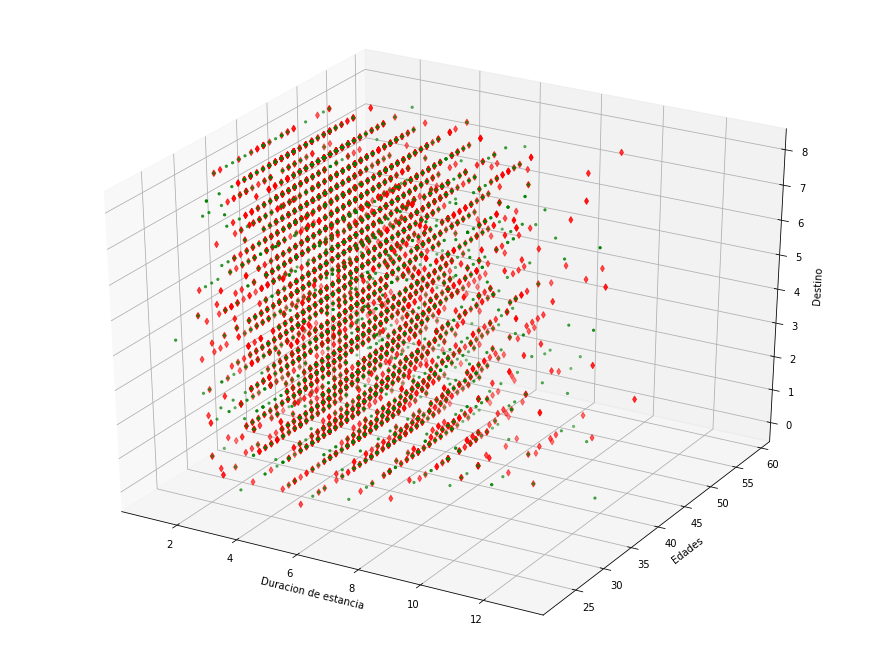

In [20]:
fig = plt.figure(figsize=(12,9))
ax = Axes3D(fig)
ax.set_xlabel('Duracion de estancia')
ax.set_ylabel('Edades')
ax.set_zlabel('Destino')
ax.scatter(df0['duracion_estadia'], df0['edad'], df0['codigo_destino'], zdir='z', c='g', marker='.')
ax.scatter(df1['duracion_estadia'], df1['edad'], df1['codigo_destino'], zdir='z', c='r', marker='d')

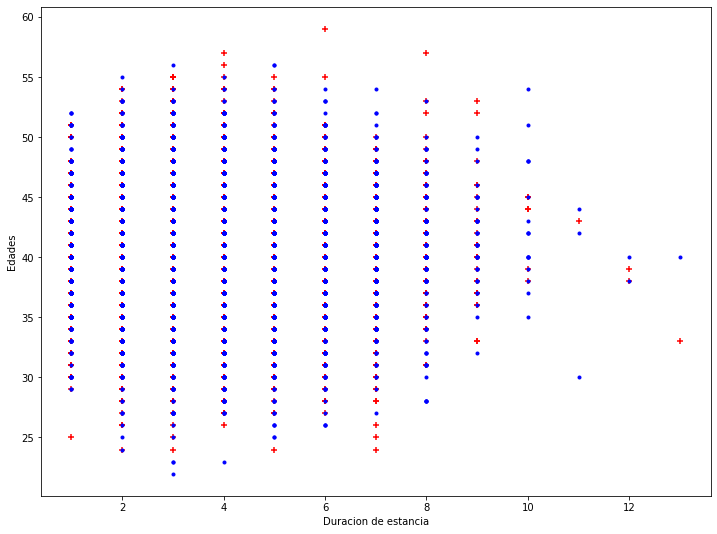

In [21]:
plt.figure(figsize=(12,9))
plt.xlabel('Duracion de estancia')
plt.ylabel('Edades')
plt.scatter(df0['duracion_estadia'], df0['edad'], color='red', marker='+')
plt.scatter(df1['duracion_estadia'], df1['edad'], color='blue', marker='.')

Entrenar modelo

In [23]:
X = train.drop(['tipo_acomodacion', 'id'], axis='columns')
X.head()

,duracion_estadia,genero,edad,niños,codigo_destino
0,7,1,40,0,2
1,5,0,40,0,0
2,4,1,39,1,3
3,5,1,45,0,5
4,5,0,45,1,7


In [24]:
y = train['tipo_acomodacion']
y

0       0
1       0
2       1
3       1
4       1
       ..
9863    0
9864    0
9865    1
9866    1
9867    0
Name: tipo_acomodacion, Length: 9868, dtype: int64

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, train_size=0.85)

In [30]:
len(X_train), len(X_test)

(8387, 1481)

In [31]:
model = svm.SVC()
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [32]:
model.score(X_test, y_test)

0.574611748818366

Predecir

In [33]:
y_pred = model.predict(X_test)

In [34]:
accSVC = accuracy_score(y_test, y_pred)
print(accSVC)

0.574611748818366


Datos externos

In [35]:
X_ext = acomodacion.drop(['tipo_acomodacion', 'id'], axis='columns')

In [36]:
X_ext['edad'].fillna(X_ext['edad'].mean(), inplace=True)
X_ext['edad'] = X_ext['edad'].astype(int)

In [37]:
X_ext['niños'].fillna(0, inplace=True)
X_ext['niños'] = X_ext['niños'].astype(int)

In [38]:
X_ext

,duracion_estadia,genero,edad,niños,codigo_destino
0,2,1,38,0,8
1,6,0,37,0,3
2,1,0,37,1,3
3,5,1,50,0,7
4,4,1,42,1,1
...,...,...,...,...,...
4224,3,0,40,0,3
4225,4,1,35,0,5
4226,7,1,40,1,6
4227,4,0,48,0,7


In [39]:
model.predict(X_ext)

array([1, 1, 1, ..., 1, 1, 1])

In [40]:
acomodacion['tipo_acomodacion'] = model.predict(X_ext)

In [41]:
acomodacion

,id,duracion_estadia,genero,edad,niños,codigo_destino,tipo_acomodacion
0,1013321,2,1,38.0,0.0,8,1
1,1009487,6,0,37.0,0.0,3,1
2,1002727,1,0,37.0,1.0,3,1
3,1001135,5,1,50.0,0.0,7,1
4,1000796,4,1,42.0,1.0,1,1
...,...,...,...,...,...,...,...
4224,1007287,3,0,NaN,0.0,3,1
4225,1009717,4,1,35.0,NaN,5,1
4226,1012540,7,1,NaN,1.0,6,1
4227,1000617,4,0,48.0,0.0,7,1


Usando Kmeans

In [42]:
kmeans = KMeans(n_clusters=2)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [43]:
kmodel = kmeans.fit(X_train)
kmodel

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [44]:
tipo_a = kmeans.predict(X_test)
tipo_a

array([1, 0, 0, ..., 0, 1, 0], dtype=int32)

In [45]:
tipo_ac = kmeans.predict(X_ext)
tipo_ac

array([0, 0, 0, ..., 0, 1, 0], dtype=int32)

In [46]:
acomodacion['tipo_acomodacion'] = tipo_ac
acomodacion

,id,duracion_estadia,genero,edad,niños,codigo_destino,tipo_acomodacion
0,1013321,2,1,38.0,0.0,8,0
1,1009487,6,0,37.0,0.0,3,0
2,1002727,1,0,37.0,1.0,3,0
3,1001135,5,1,50.0,0.0,7,1
4,1000796,4,1,42.0,1.0,1,1
...,...,...,...,...,...,...,...
4224,1007287,3,0,NaN,0.0,3,0
4225,1009717,4,1,35.0,NaN,5,0
4226,1012540,7,1,NaN,1.0,6,0
4227,1000617,4,0,48.0,0.0,7,1


In [47]:
dfac0 = acomodacion[acomodacion.tipo_acomodacion==0]
dfac1 = acomodacion[acomodacion.tipo_acomodacion==1]

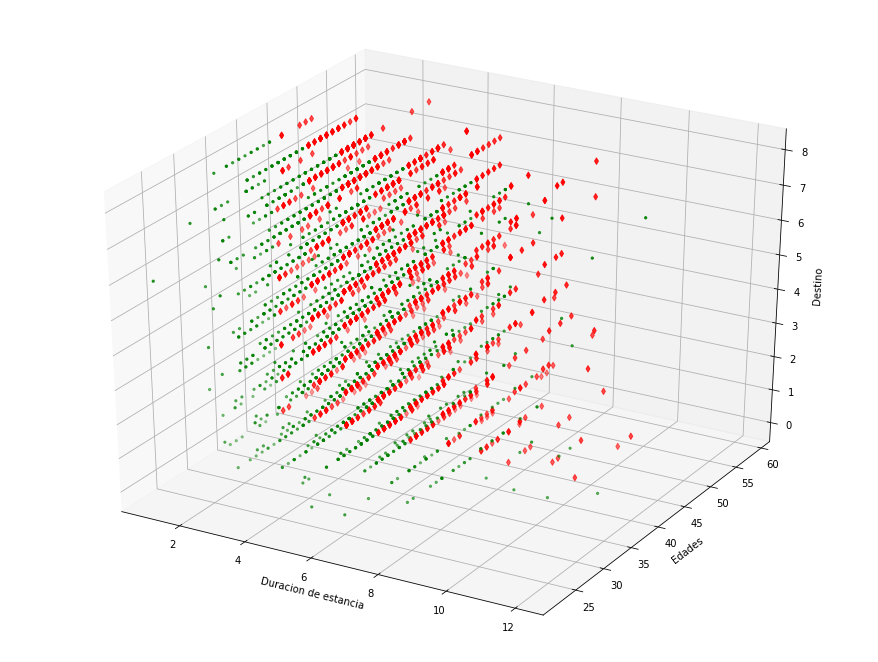

In [48]:
fig_ac = plt.figure(figsize=(12,9))
axac = Axes3D(fig_ac)
axac.set_xlabel('Duracion de estancia')
axac.set_ylabel('Edades')
axac.set_zlabel('Destino')
axac.scatter(dfac0['duracion_estadia'], dfac0['edad'], dfac0['codigo_destino'], zdir='z', c='g', marker='.')
axac.scatter(dfac1['duracion_estadia'], dfac1['edad'], dfac1['codigo_destino'], zdir='z', c='r', marker='d')

Random Forest

In [49]:
clf = RandomForestClassifier()

In [50]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [51]:
y_pred_forest = clf.predict(X_test)
y_pred_forest

array([0, 0, 1, ..., 1, 0, 0])

In [58]:
acc_forest = metrics.accuracy_score(y_test, y_pred_forest)
acc_forest

0.7332883187035787

In [54]:
tipo_aco = clf.predict(X_ext)
tipo_aco

array([0, 1, 0, ..., 1, 1, 1])

In [55]:
acomodacion['tipo_acomodacion'] = tipo_aco
acomodacion

,id,duracion_estadia,genero,edad,niños,codigo_destino,tipo_acomodacion
0,1013321,2,1,38.0,0.0,8,0
1,1009487,6,0,37.0,0.0,3,1
2,1002727,1,0,37.0,1.0,3,0
3,1001135,5,1,50.0,0.0,7,1
4,1000796,4,1,42.0,1.0,1,0
...,...,...,...,...,...,...,...
4224,1007287,3,0,NaN,0.0,3,1
4225,1009717,4,1,35.0,NaN,5,0
4226,1012540,7,1,NaN,1.0,6,1
4227,1000617,4,0,48.0,0.0,7,1


In [56]:
dfaco0 = acomodacion[acomodacion.tipo_acomodacion==0]
dfaco1 = acomodacion[acomodacion.tipo_acomodacion==1]

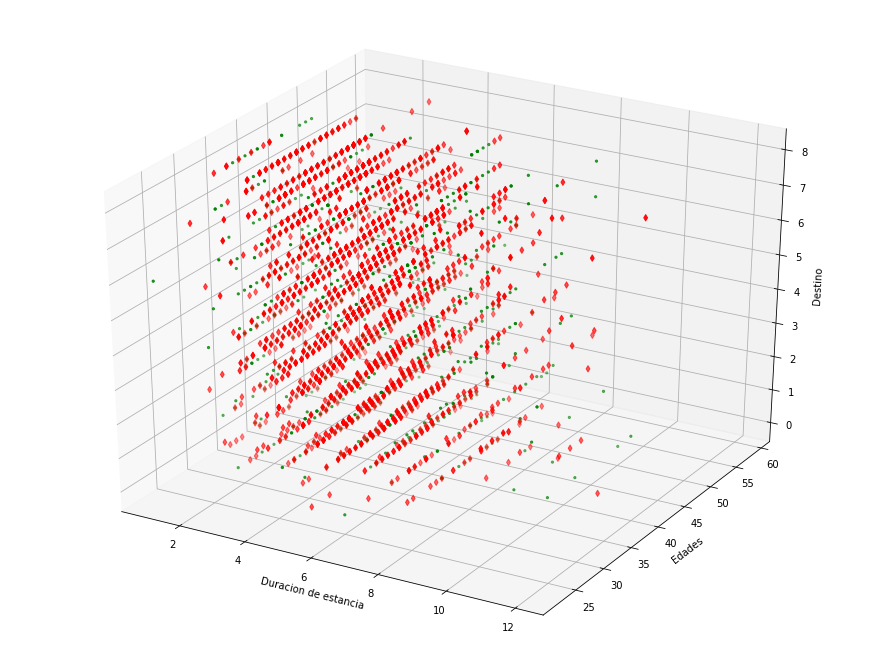

In [57]:
fig_aco = plt.figure(figsize=(12,9))
axac = Axes3D(fig_aco)
axac.set_xlabel('Duracion de estancia')
axac.set_ylabel('Edades')
axac.set_zlabel('Destino')
axac.scatter(dfaco0['duracion_estadia'], dfaco0['edad'], dfaco0['codigo_destino'], zdir='z', c='g', marker='.')
axac.scatter(dfaco1['duracion_estadia'], dfaco1['edad'], dfaco1['codigo_destino'], zdir='z', c='r', marker='d')



---

